In [1]:
from data_loader import get_loader
from torchvision.transforms import functional as F

In [2]:
class tmp():
    def __init__(self):
        self.bg_dir = "exp/bg"
        self.ped_dir = "exp/ped"
        self.mask_dir = "exp/mask/"

        self.flip = 0.5  # prob of horizontally flipping inputs
        self.bg_jitter_b = 0# config.bg_jitter_b  # how much to jitter bg brightness
        self.bg_jitter_c = 0# config.bg_jitter_c  # how much to jitter bg contrast
        self.bg_jitter_s = 0# config.bg_jitter_s  # how much to jitter bg saturation
        self.bg_jitter_h = 0

        self.bg_load_size = 256


config = tmp()
loader = get_loader(config, 1)

Successfully initialized dataset of size: 1.


torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])


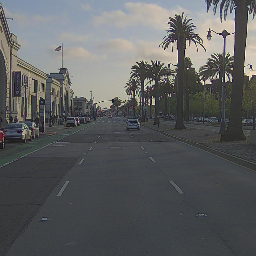

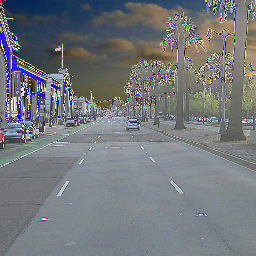

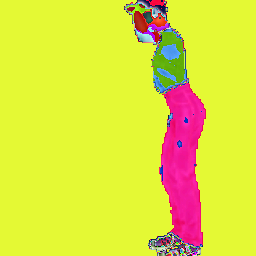

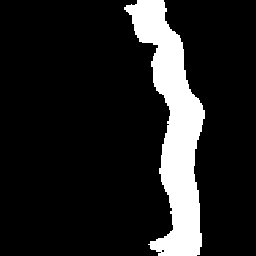

In [3]:
for bg, bg_norm, ped, combined_mask, all_masks in loader:
    # print(bg.shape)
    # print(bg_norm.shape)
    # print(ped.shape)
    # print(combined_mask.shape)
    # print(all_masks.shape)
    display(F.to_pil_image(bg[0, :, :, :]))
    # display(F.to_pil_image(bg_norm[0, :, :, :]))
    display(F.to_pil_image(ped[0, :, :, :]))
    display(F.to_pil_image(combined_mask[0, :, :, :]))

    c = combined_mask
    b = bg


In [7]:
(b / 255)

tensor([[[[127., 127., 128.,  ...,  68.,  56., 102.],
          [125., 128., 128.,  ...,  76.,  57.,  83.],
          [111., 127., 128.,  ...,  67.,  61., 102.],
          ...,
          [ 54.,  54.,  57.,  ...,  59.,  59.,  59.],
          [ 56.,  54.,  54.,  ...,  58.,  62.,  62.],
          [ 56.,  55.,  53.,  ...,  56.,  58.,  60.]],

         [[143., 143., 144.,  ...,  63.,  67., 121.],
          [141., 144., 147.,  ...,  69.,  61.,  91.],
          [137., 152., 146.,  ...,  67.,  58., 100.],
          ...,
          [ 55.,  55.,  58.,  ...,  60.,  63.,  63.],
          [ 57.,  55.,  55.,  ...,  60.,  65.,  65.],
          [ 57.,  56.,  54.,  ...,  60.,  62.,  64.]],

         [[168., 168., 169.,  ...,  65.,  57., 109.],
          [161., 163., 163.,  ...,  78.,  65.,  93.],
          [136., 159., 167.,  ...,  66.,  70., 112.],
          ...,
          [ 57.,  57.,  60.,  ...,  64.,  64.,  64.],
          [ 60.,  58.,  58.,  ...,  63.,  69.,  68.],
          [ 61.,  60.,  58.,  ...

tensor([[[0.4980, 0.4980, 0.5020,  ..., 0.2667, 0.2196, 0.4000],
         [0.4902, 0.5020, 0.5020,  ..., 0.2980, 0.2235, 0.3255],
         [0.4353, 0.4980, 0.5020,  ..., 0.2627, 0.2392, 0.4000],
         ...,
         [0.2118, 0.2118, 0.2235,  ..., 0.2314, 0.2314, 0.2314],
         [0.2196, 0.2118, 0.2118,  ..., 0.2275, 0.2431, 0.2431],
         [0.2196, 0.2157, 0.2078,  ..., 0.2196, 0.2275, 0.2353]],

        [[0.5608, 0.5608, 0.5647,  ..., 0.2471, 0.2627, 0.4745],
         [0.5529, 0.5647, 0.5765,  ..., 0.2706, 0.2392, 0.3569],
         [0.5373, 0.5961, 0.5725,  ..., 0.2627, 0.2275, 0.3922],
         ...,
         [0.2157, 0.2157, 0.2275,  ..., 0.2353, 0.2471, 0.2471],
         [0.2235, 0.2157, 0.2157,  ..., 0.2353, 0.2549, 0.2549],
         [0.2235, 0.2196, 0.2118,  ..., 0.2353, 0.2431, 0.2510]],

        [[0.6588, 0.6588, 0.6627,  ..., 0.2549, 0.2235, 0.4275],
         [0.6314, 0.6392, 0.6392,  ..., 0.3059, 0.2549, 0.3647],
         [0.5333, 0.6235, 0.6549,  ..., 0.2588, 0.2745, 0.

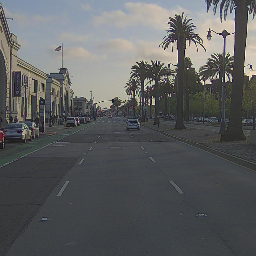

In [15]:
test = b[0, :, :, :] / 255
print(test)
F.to_pil_image(test)

In [20]:
import torch
~c

TypeError: ~ (operator.invert) is only implemented on integer and Boolean-type tensors

good


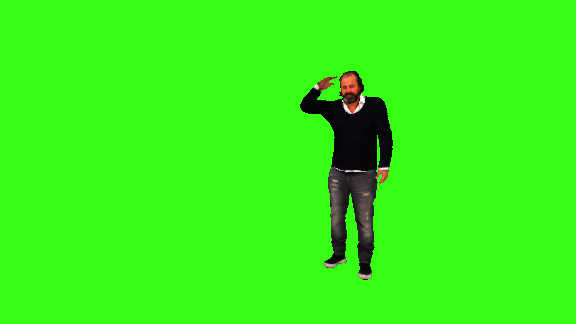

In [40]:
from PIL import Image
import numpy as np
from utils import *

raw = Image.open('scripts/good.png').convert('RGB')
raw_arr = np.array(raw)[:, :, :3]
colors = raw.getcolors(maxcolors=10000)
if len(colors) == 2:
    print('bad')
else:
    print('good')
display(raw)

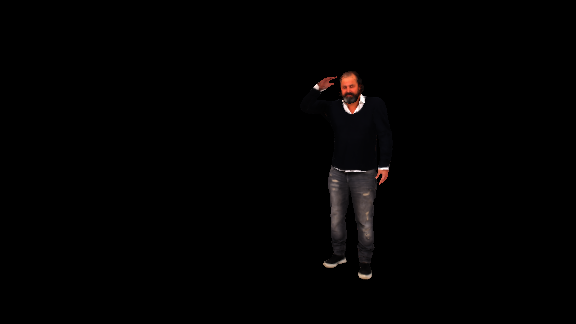

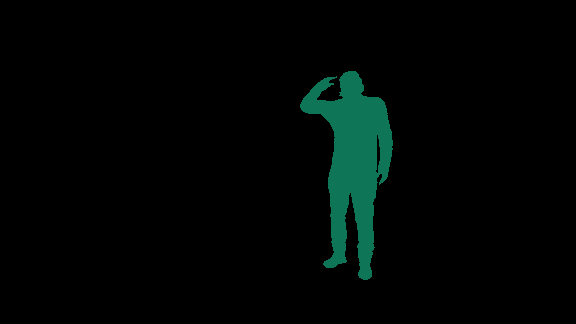

In [45]:
bg_mask = mask_from_rgb_threshold((55, 255, 20), raw_arr)

ped = raw_arr.copy()
ped[bg_mask] = (0, 0, 0)
display(Image.fromarray(ped))

colormask = raw_arr.copy()
color = list(np.random.choice(range(1, 256), size=3))
colormask[bg_mask] = (0, 0, 0)
colormask[~bg_mask] = color
display(Image.fromarray(colormask))



In [11]:
import cv2
from PIL import Image
import numpy as np

im = cv2.imread('/home/ubuntu/code/SynthCLIP/exp/mask/0.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

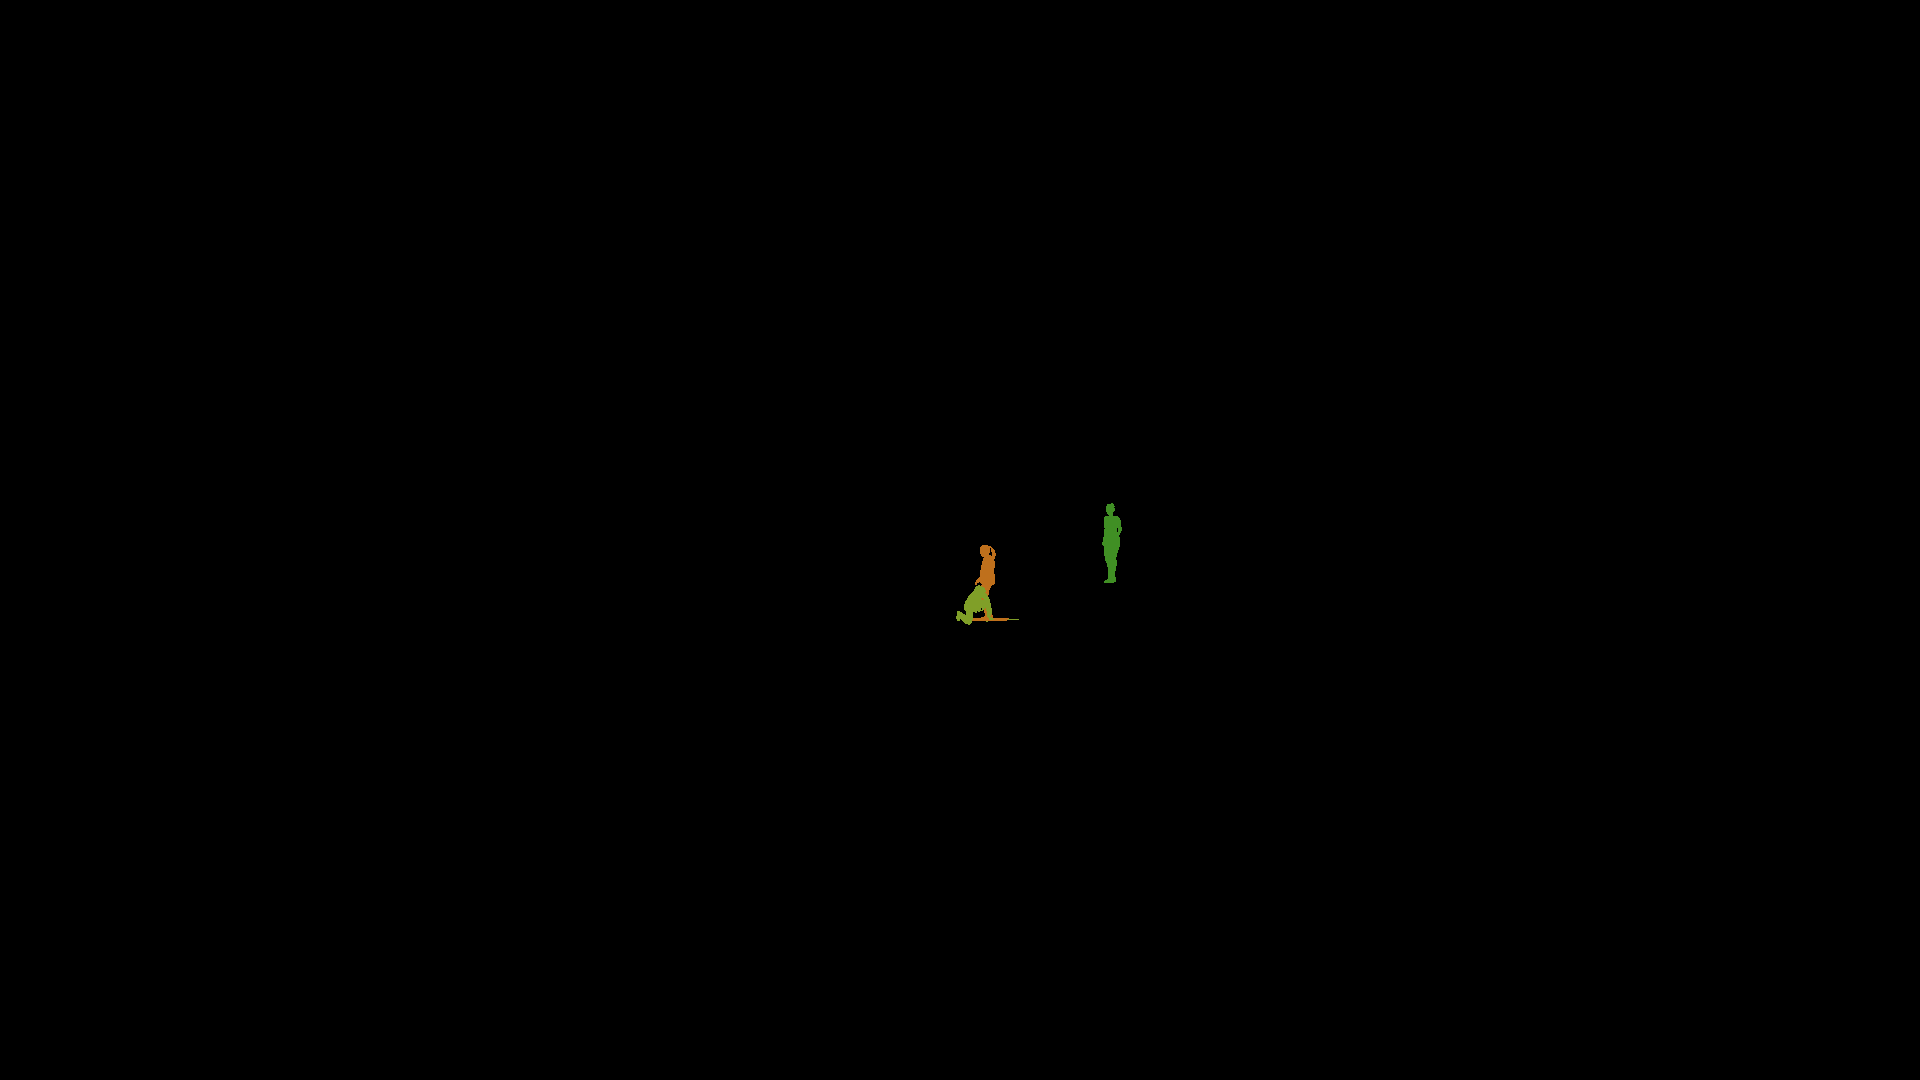

In [12]:
display(Image.fromarray(im))

In [27]:
from utils import *

colors = get_unique_colors(im)

In [28]:
colors

array([[  0,   0,   0],
       [ 64, 143,  36],
       [128, 159,  40],
       [191, 112,  28]], dtype=uint8)

In [33]:
colors[np.sum(colors, axis = 1) != 0]

array([[ 64, 143,  36],
       [128, 159,  40],
       [191, 112,  28]], dtype=uint8)

In [25]:
colors

array([[[ 64, 143,  36, 128, 159,  40, 191, 112,  28]]], dtype=uint8)

In [39]:

np.unique(colors.reshape(-1, 3), axis=0)

array([[  0,   0,   0],
       [ 64, 143,  36],
       [128, 159,  40],
       [191, 112,  28]], dtype=uint8)

In [12]:
# get bg from s3 cameras for pandaset
import os
import shutil
from tqdm import tqdm

root_dir = '/home/ubuntu/data/pandaset_full_frame/'
target_dir = '/home/ubuntu/data/pandaset_synthclip/bg/'
for subdir, dirs, files in tqdm(os.walk(root_dir)):
    for file in files:
        path = os.path.join(subdir, file)
        if 'camera' in str(path):
            splt = path.split('/')
            task = splt[-4]
            frameno = splt[-2]
            view = splt[-1]
            new_path = os.path.join(target_dir, f'{task}_{frameno}_{view}')
            shutil.copyfile(path, new_path)
            # print(task, frameno, view)


2893it [00:23, 123.58it/s]
